<a href="https://colab.research.google.com/github/Camilopc-coder/CODERHOUSE/blob/main/ENTREGAS/ProyectoDS_Parte1_Pavas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTRODUCCION


Para desarrollar este primer entregable, escogi un dataset enfocado en la venta de videojuegos y su popularidad a nivel mundial. Escogi este dataset porque soy fanatico de los videojuegos y las consolas, siempre me ha gustado comparar los mejores.



El dataset fue sacado de la siguiente fuente:
https://www.kaggle.com/datasets/ibriiee/video-games-sales-dataset-2022-updated-extra-feat



Este dataset cuenta entrega datos de el nombre del videojuego, la plataforma, el año de lanzamiento, el género, el editor y las ventas en Norteamérica, Europa, Japón y otras regiones. También presenta las puntuaciones y clasificaciones tanto de críticos como de usuarios, incluyendo la puntuación media de los críticos, el número de críticos que realizaron reseñas, la puntuación media de los usuarios, el número de usuarios que realizaron reseñas, el desarrollador y la clasificación


Importacion de librerias y la carga de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set_style("whitegrid")

matplotlib.rcParams['figure.figsize']=(36,20)
from google.colab import files
import io

In [ ]:
dataset = files.upload()

In [ ]:
df = pd.read_csv("Video_Games.csv")
df.head(500)

In [ ]:
df.shape

In [ ]:
print(df.columns)

Visualizando el dataset veo que tiene 16719 filas y 16 columnas pero veo que estan en ingles. Como quiero traducir todas las columnas del ingles al español, entonces primero quiero saber cuales son todas y luego hago el renombrado de estas

In [ ]:
traduccion_de_columnas = {
    'Name': 'Nombre',
    'Platform': 'Plataforma',
    'Year_of_Release': 'Año_de_Lanzamiento',
    'Genre': 'Genero',
    'Publisher': 'Editor',
    'NA_Sales': 'Ventas_NA',
    'EU_Sales': 'Ventas_EU',
    'JP_Sales': 'Ventas_JP',
    'Other_Sales': 'Otras_Ventas',
    'Global_Sales': 'Ventas_Globales',
    'Critic_Score': 'Puntuacion_Criticos',
    'Critic_Count': 'Conteo_Criticos',
    'User_Score': 'Puntuacion_Usuarios',
    'User_Count': 'Conteo_Usuarios',
    'Developer': 'Desarrollador',
    'Rating': 'Clasificacion'
}

df = df.rename(columns=traduccion_de_columnas)

print("Nuevos nombres de las columnas:")
print(df.columns)


Ahora quiero ver como quedo mi dataset

In [ ]:
df.info()

Teniendo en cuenta el resultado de arriba, puedo entender que:

* no todos los juegos fueron puntuados o tienen una clasificacion

* el año de lanzamiento y el nombre coinciden con el indice

Entonces el siguiente paso será limpiar mi dataset  

In [ ]:
#remuevo los valores NULL en la columna de año de lanzamiento
df.drop(df[df.Año_de_Lanzamiento.isnull()].index, inplace=True)

#remuevo los valores NULL en la columna del Nombre
df.drop(df[df.Nombre.isnull()].index, inplace=True)

#remuevo los valores NULL en la columna del Editor
df.drop(df[df.Editor.isnull()].index, inplace=True)
df.info()



Una vez tengo mi data set limpio, me gustaria tener una descripcion del mismo mas minuciosa

In [ ]:
df.describe()

DESCRIPCION DEL DATASET

---
Ahora haré una descripcion de las columnas del dataset y de los datos arrojados

COLUMNAS

* Nombre: Es el nombre del videojuego             
* Plataforma: Es la consola donde se puede jugar
* Año_de_Lanzamiento: El año cuando fue lanzado  
* Genero: El genero puede ir desde accion, deportes, musica, carreras y otros.               
* Editor: Es basicamente el encargado de haber lanzado el juego             
* Ventas_NA: En esta columna irá el numero de ventas de norteameria             
* Ventas_EU: En esta columna irá el numero de ventas de europa en general            
* Ventas_JP: En esta columna irá el número de ventas de Japón           
* Otras_Ventas: Esta columna contrendá el número de ventas que no están incluidas en las demas columnas, tendrá paises de latinoameria y asiaticos            
* Ventas_Globales: Esta columna contiene el total de ventas sumadas por cada juego       
* Puntuacion_Criticos: Contiene el puntaje criticos del juego   
* Conteo_Criticos: Aqui va el número de criticos que puntuaron el juego      
* Puntuacion_Usuarios: Este contiene el puntaje de los usuarios en general de cada uno de los juegos
* Conteo_Usuarios: El número de usuarios que dieron puntuación       
* Desarrollador: Contiene la informacion del diseñador y desarrollador del juego          
* Clasificacion: Es la etiqueta del juego según su contenido y hacia qué publico especifico va dirigido, puede ser una letra o varias con un número

---

ANALISIS

* Al hacer el uso de la funcion 'describe' puedo entender que en mi dataset hay informacion de ventas desde 1980 hasta el 2020.

* Norteameria parecer ser el mercado que más movimiento tiene en cuanto a ventas

* Los valores de ventas estan dados en MILLÓNES

---

Ahora me gustaria visualizar el total de ventas a lo largo del tiempo para mejorar la comprensión de mi dataset

In [ ]:
sns.countplot(x=df['Año_de_Lanzamiento'], palette="Spectral_r")
plt.title('Total de ventas a lo largo del tiempo')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Total de ventas')
plt.show()

Ahora teniendo en cuenta la grafica de ventas, veo que en el año 2016 en adelante no hay muchos datos, entonces optaré por quitar esos años de mi dataset

In [ ]:
df.drop(df[df['Año_de_Lanzamiento']>2016].index, inplace=True)

In [ ]:
sns.countplot(x=df['Año_de_Lanzamiento'], palette="Spectral_r")
plt.title('Total de ventas a lo largo del tiempo')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Total de ventas')
plt.show()



HIPOTESIS

---

Ahora que tengo un dataset mas limpio, y tengo claro varios aspectos hare mis hipotesis

1. Cual es el genero que mas ventas ha generado a nivel global? y cual es el genero que mas ventas ha generado en Japon?

2. Cual es el editor que más ventas tiene en Norteamerica? y cual es el juego más jugado de esta plataforma?

3. Cual es la plataforma que más ventas ha tenido en toda la historia globalmente? y cual es la plataforma más vendida en cada una de las regiones distintivas

---

1. El genero de acción (Action) es el genero que más ventas tendrá a nivel global, seguido del genero de disparos (Shooter) y en tercera pocisión el genero de aventura (Adventure). Pero en Japon el genero sera el de miscelaneas (Misk), dado que en esa zona del mundo suelen jugar más juego alternativos

2. El editor que más ventas tendrá en Norteamerica, será Activision y su juego más jugado será un CALL OF DUTY

3. La plataforma que más ha vendido en toda la historia será la Nintendo Wii seguido de la PS2 y luego la PS3
En cambio, en estados unidos la XBOX360 será la primera, seguido de PS3 y en tercera posicion PC
En Japon, será la NintendoDS será la principal plataforma, ya que nació allá, seguido de la Wii y en tercera posicion la PS2
En Europa la cosa cambiará rotundamente, siendo el PC la principal plataforma de juegos, seguido del XBOX360 y en tercera posición la PS2

---


# 1. Cual es el genero que mas ventas ha generado a nivel global? y cual es el genero que más ventas ha generado en japon?



In [ ]:
# Genero mi df agrupados por genero y ordenado por las ventas globales
df_top_genero = df.groupby('Genero')['Ventas_Globales'].sum().reset_index()

df_top_genero = df_top_genero.sort_values(by='Ventas_Globales', ascending=False)

print("Géneros con las mayores ventas globales:")
print(df_top_genero.head())

Géneros con las mayores ventas globales:
          Genero  Ventas_Globales
0         Action          1717.63
10        Sports          1310.39
8        Shooter          1041.83
7   Role-Playing           930.90
4       Platform           825.86


In [ ]:
# Agrupo el df por genero y luego hago una suma de las ventas
df_genero_ventas = df.groupby('Genero')[['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas']].sum().reset_index()

print(df_genero_ventas)

In [ ]:
# Calculo las ventas globales para mi df y lo organizo
df_genero_ventas['Ventas_Globales'] = df_genero_ventas[['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas']].sum(axis=1)

print (df_genero_ventas)

In [ ]:
df_top3_genero_jp = df_genero_ventas.nlargest(3, 'Ventas_JP')

print(df_top3_genero_jp)


          Genero  Ventas_NA  Ventas_EU  Ventas_JP  Otras_Ventas  \
7   Role-Playing     330.04     188.24     353.39         59.41   
0         Action     863.17     510.99     160.13        182.22   
10        Sports     671.20     371.33     134.93        132.21   

    Ventas_Globales  
7            931.08  
0           1716.51  
10          1309.67  


In [ ]:
# Saco el top 10 generos
top_10_generos = df_genero_ventas.nlargest(10, 'Ventas_Globales')

# Creo el df para graficar
df_grafico_top_genero = top_10_generos.melt(
    id_vars=['Genero'],
    value_vars=['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas'],
    var_name='Region',
    value_name='Ventas (En millones)')

# Renombro las etiquetas
df_grafico_top_genero['Region'] = df_grafico_top_genero['Region'].replace({
    'Ventas_NA': 'VENTAS DE NORTEAMERICA',
    'Ventas_EU': 'VENTAS DE EUROPA',
    'Ventas_JP': 'VENTAS DE JAPON',
    'Otras_Ventas': 'VENTAS DE OTROS PAISES'})

print (df_grafico_top_genero)

Una vez tengo mi top genero listo, procedo a graficar

In [ ]:
plt.figure(figsize=(16, 8))

# Genero el gráfico de barras agrupadas usando barplot
sns.barplot(
    x='Genero',
    y='Ventas (En millones)',
    hue='Region',
    data = df_grafico_top_genero,
    palette=['blue', 'green', 'red', 'pink'],
ci=None) # Elimino lineas negras de dispersion

# Configuro el estilo del gráfico y las etiquetas
plt.title('GENEROS CON LAS MAYORES VENTAS DISTRIBUIDAS', fontsize=18, fontweight='bold')
plt.xlabel('GENERO', fontsize=14, fontweight='bold')
plt.ylabel('VENTAS (EN MILLONES)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=13)

# Configuro la leyenda
plt.legend(title='REGION',
           loc='upper right',
           fontsize=13,
           title_fontsize='14',)

plt.tight_layout()

plt.show()


Hago un diagrama tipo pie distribuido en el top 3 generos con más ventas en japon

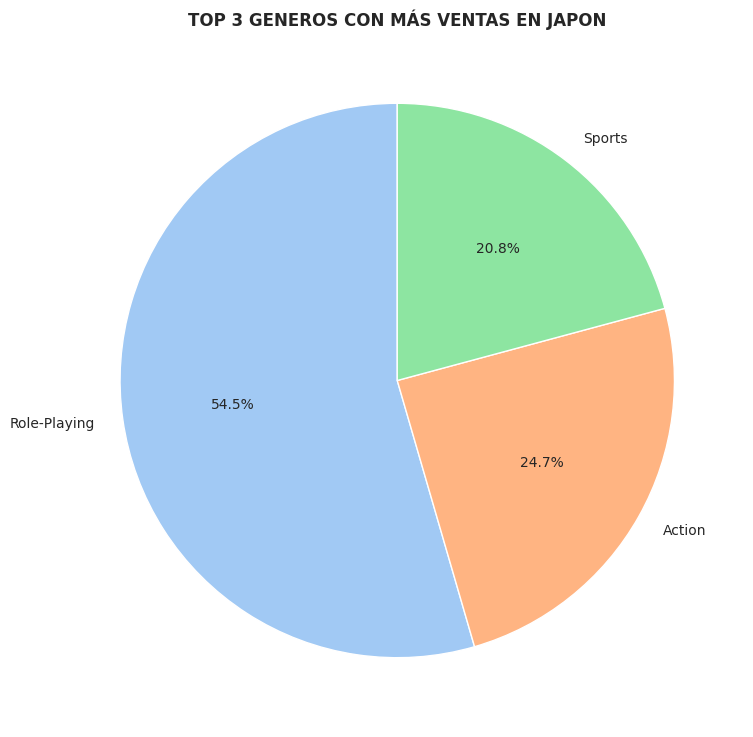

In [ ]:
plt.figure(figsize=(15, 9))

# Genero un grafico de torta o (pie)
plt.pie(df_top3_genero_jp['Ventas_JP'],
        labels=df_top3_genero_jp['Genero'],
        autopct='%1.1f%%',
        startangle=90,
        colors= sns.palettes.color_palette('pastel'))
plt.title('TOP 3 GENEROS CON MÁS VENTAS EN JAPON', fontweight='bold')
plt.show()

#1. RESPUESTA:
---
Dado al grafico de barras, la conclución final es que el genero que más tiene dominancia en ventas el global es el genero de accion (Action), seguido del genero de deportes (Sports) y de tercero el de disparos (Shooter).

Pero en Japon analizacdo desde el grafico de barras y el tipo pie el genero más dominante en ventas es de juegos de rol (Role-play), seguido por el genero de accion (Action) y luego el de deportes (Sports)

---

# 2. Cual es el editor que más ventas tiene en Norteamerica? y cual es el juego más jugado de esta plataforma?

In [ ]:
# Primero hago el top 10 editores y los organizo
top_editores=df.groupby('Editor')

top_editores_NA=top_Editor.sort_values('Ventas_NA',ascending=False).head(10)

top_editores_NA

,Nombre,Plataforma,Año_de_Lanzamiento,Genero,Ventas_NA,Ventas_EU,Ventas_JP,Otras_Ventas,Ventas_Globales,Puntuacion_Criticos,Conteo_Criticos,Puntuacion_Usuarios,Conteo_Usuarios,Desarrollador,Clasificacion
Editor,,,,,,,,,,,,,,,
Nintendo,Wii SportsSuper Mario Bros.Mario Kart WiiWii S...,WiiNESWiiWiiGBGBDSWiiWiiNESDSDSGBWiiWiiSNESDSD...,1402730.0,SportsPlatformRacingSportsRole-PlayingPuzzlePl...,815.86,418.58,457.74,94.55,1786.72,23327.0,12974.0,88.388.56.68.48.67.77.47.97.18.98.28.78.98.47....,58061.0,NintendoNintendoNintendoNintendoNintendoNinten...,EEEEEEEEEEETEEEEEEEEEEETETEEEEE10+EEEEETEEEE10...
Electronic Arts,FIFA 16FIFA Soccer 13The Sims 3Star Wars Battl...,PS4PS3PCPS4PS4X360PS2PS3PS2PS2PS3PS3PS4PS2X360...,2696650.0,SportsActionSimulationShooterSportsShooterRaci...,588.65,370.02,14.29,126.82,1100.05,75633.0,27872.0,4.36.67.657.48.67.58.68.54.35.76.66.17.6888.27...,168036.0,EA SportsElectronic ArtsThe Sims StudioEA Spor...,EETEMEMETEETETEETEETEEEEMMETEEEETMTEMMMMETTEEE...
Activision,Call of Duty: Modern Warfare 3Call of Duty: Bl...,X360PS4X360PS3X360X360PS3PS3PS3X360PS3X360PS4X...,1959140.0,ShooterShooterShooterShooterShooterShooterShoo...,428.92,214.10,6.71,75.27,725.14,39196.0,15174.0,3.46.35.34.86.33.26.46.32.62.68.45.77.68.47.36...,119603.0,"Infinity Ward, Sledgehammer GamesTreyarchTreya...",MMMMMMMMMMMMMMTTMMMTTTTTTEMTMMTTME10+TTE10+TTM...
Sony Computer Entertainment,Gran Turismo 3: A-SpecGran Turismo 4Gran Turis...,PS2PS2PSPS3PSPSPS2PSPSPSPSPS3PS3PS2PS3PSPS4PS3...,1375104.0,RacingRacingRacingRacingRole-PlayingRacingRole...,266.17,186.40,74.15,79.62,606.27,25827.0,12980.0,8.48.58.77.59.298.79.18.98.38.88.86.88.97.98.1...,88341.0,Polyphony DigitalPolyphony DigitalPolyphony Di...,EEEETTTTETTEETTTMETMME10+EEMTE10+EMEMEEEMMMMTE...
Ubisoft,Just Dance 3Just Dance 2Just DanceJust Dance 4...,WiiWiiWiiWiiPS3PS3X360X360X360PS3WiiPS3X360PS4...,1865380.0,MiscMiscMiscMiscActionActionAdventureActionAct...,251.85,161.72,7.35,49.07,470.16,38107.0,14020.0,7.87.387.36.98.67.76.78.87.38.37.57.26.37.74.9...,85927.0,UbisoftUbisoftUbisoft ParisUbisoftUbisoftUbiso...,E10+E10+E10+E10+MMMMMME10+MMMMMMME10+MMMMMMTME...
Take-Two Interactive,Grand Theft Auto VGrand Theft Auto: San Andrea...,PS3PS2X360PS2PS2PS4X360PS3PSPPS3X360XOnePSPX36...,845488.0,ActionActionActionActionActionActionActionActi...,222.92,119.06,5.93,55.68,403.58,21966.0,9568.0,8.298.18.78.58.37.97.57.68.897.988.766.78.47.8...,108525.0,Rockstar NorthRockstar NorthRockstar NorthRock...,MMMMMMMMMMMMMMEE10+E10+MMTMMMEMMTEEEETTE10+MME...
THQ,WWF SmackDown!Rugrats in Paris: The MovieRugra...,PSPSPSPSX360PS2PS2PS2GBAPS2PS2X360PS2PS3WiiN64...,1428311.0,FightingActionAdventureFightingActionSportsFig...,207.55,93.66,5.01,31.87,338.11,26909.0,8768.0,8.177.68.67.7tbd7.67.27.58.96.27.9tbd7.489.29....,28274.0,Volition Inc.Vicarious VisionsVolition Inc.Yuk...,MEMTMETTMEETEEMETTEEMEEEEMEEEEEMTTETTTTTTEEEEE...
Microsoft Game Studios,Kinect Adventures!Halo 3Halo: ReachHalo 4Minec...,X360X360X360X360X360XBX360XBX360X360X360X360X3...,383307.0,MiscShooterShooterShooterMiscShooterShooterSho...,157.43,68.64,3.30,18.91,248.32,11188.0,7460.0,6.37.87.978.27.78.67.17.87.48.386.58.26.46.58....,55587.0,"Good Science StudioBungie Software, BungieBung...",EMMMMMMMME10+MEMETMEMMMMTME10+EEETTETMTEEMMEE1...
Sega,Mario & Sonic at the Olympic GamesSonic the He...,WiiGENDSWiiGENWiiDSDSPS2PS2X360WiiPS2GENGCDCPS...,1261365.0,SportsPlatformSportsSportsPlatformSportsSports...,107.99,80.08,56.17,23.59,268.06,22051.0,9481.0,8.57.88.66.86.68.28.38.68.15.77.37.588.38.59.1...,34116.0,"Dimps Corporation, Sonic TeamSonic TeamSonic T...",EEEE10+EEEE10+EEE10+ETEEEEEEEEE10+EETEEEMTE10+...


In [ ]:
# Hago el top 3 editores de NA
top_3_editores_NA = top_editores_NA.nlargest(3, 'Ventas_NA')
top_3_editores_NA = df.groupby('Editor')['Ventas_NA'].sum().nlargest(3).reset_index()

print("TOP 3 EDITORES POR VENTAS EN NORTEAMERICA:")
print(top_3_editores_NA)

TOP 3 EDITORES POR VENTAS EN NORTEAMERICA:
            Editor  Ventas_NA
0         Nintendo     815.86
1  Electronic Arts     588.65
2       Activision     428.92


In [ ]:
# Sumaré las ventas totales de NA
ventas_totales_NA = df['Ventas_NA'].sum()

# Sumaré las ventas totales del top 3 editores
ventas_top3_NA = top_3_editores_NA['Ventas_NA'].sum()

# Hago el calculo de el resto de ventas en NA, restando el top 3 del total ventas, para sacar un % real de cada editor
ventas_resto_NA = ventas_totales_NA - ventas_top3_NA

# Creo el df de los datos
resto_editores = pd.DataFrame([['Resto de Editores', ventas_resto_NA]],
                        columns=['Editor', 'Ventas_NA'])

# Lo añado a mi df para poder graficar
df_torta_editor_NA = pd.concat([top_3_editores_NA, resto_editores], ignore_index=True)

print("DF FINAL PARA EL GRAFICO TIPO PIA")
print(df_torta_editor_NA)

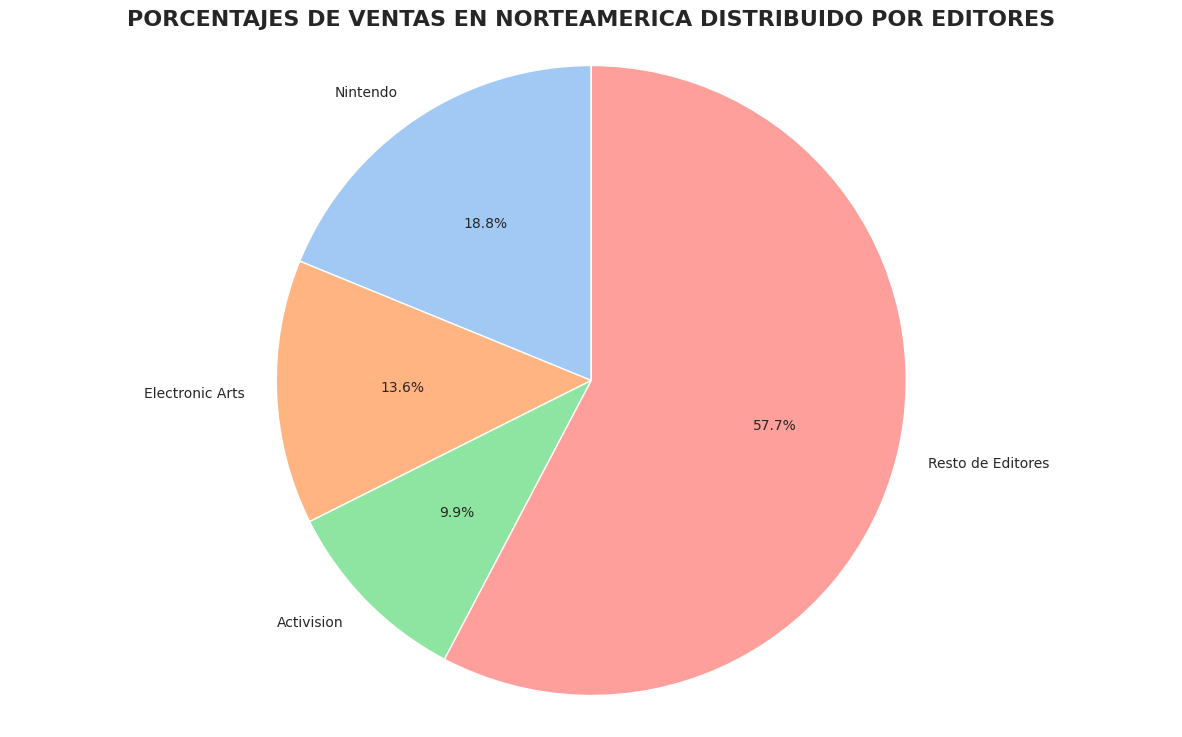

In [ ]:
# Defino un tamaño para la figura
plt.figure(figsize=(15, 9))

# Genero el gráfico de pie
plt.pie(
    df_torta_editor_NA['Ventas_NA'],
    labels=df_torta_editor_NA['Editor'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"))

plt.title(
    'PORCENTAJES DE VENTAS EN NORTEAMERICA DISTRIBUIDO POR EDITORES',
    fontsize=16,
    fontweight='bold')

plt.axis('equal')

plt.show()

In [ ]:
# realizo el top 10 de juegos de Norteamerica
top_juegos_nintendo=df.loc[df['Editor']=='Nintendo'].sort_values('Ventas_NA',ascending=False).head(10)
top_juegos_nintendo

,Nombre,Plataforma,Año_de_Lanzamiento,Genero,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Otras_Ventas,Ventas_Globales,Puntuacion_Criticos,Conteo_Criticos,Puntuacion_Usuarios,Conteo_Usuarios,Desarrollador,Clasificacion
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
18,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E


In [ ]:
# Ahora solo hago un df con los 3 mejores
top_3_juegos_nintendo = top_juegos_nintendo.nlargest(3, 'Ventas_NA')
top_3_juegos_nintendo = df.groupby('Nombre')['Ventas_NA'].sum().nlargest(3).reset_index()

print('TOP 3 JUEGOS LANZADOS POR NINTENDO EN NA')
print(top_3_juegos_nintendo)

In [ ]:
# Sumaré las ventas de todos los juegos de nintendo en NA
ventas_totales_nintendo = df.loc[df['Editor'] == 'Nintendo', 'Ventas_NA'].sum()

# Sumaré las ventas del top 3 juegos de nintendo en NA
ventas_top3_nintendo = top_3_juegos_nintendo['Ventas_NA'].sum()

# restaré el top 3 juegos del total juegos de nintendo
ventas_resto_nintendo = ventas_totales_nintendo - ventas_top3_nintendo

# crearé el df de resto de ventas y lo ubicaré
resto_juegos_nintendo = pd.DataFrame([['Resto de Juegos', ventas_resto_nintendo]],
                                     columns=('Nombre', 'Ventas_NA'))

# Crearé mi df para graficar
df_torta_juegos_nintendo = pd.concat([top_3_juegos_nintendo, resto_juegos_nintendo], ignore_index=True)

print('JUEGOS MEJOR VENDIDOS EN NORTEAMERICA')
print(df_torta_juegos_nintendo)

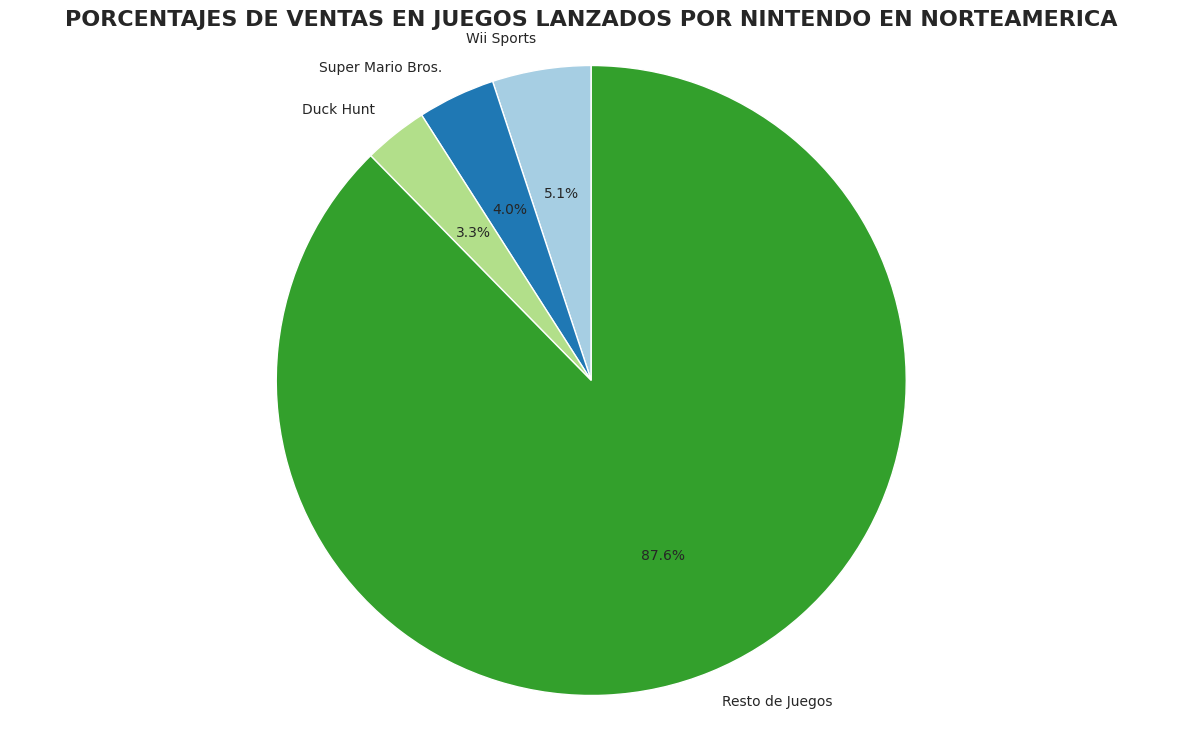

In [ ]:
plt.figure(figsize=(15,9))

# Procedo a graficar
plt.pie(
    df_torta_juegos_nintendo['Ventas_NA'],
    labels=df_torta_juegos_nintendo['Nombre'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Paired"))

plt.title(
    'PORCENTAJES DE VENTAS EN JUEGOS LANZADOS POR NINTENDO EN NORTEAMERICA',
    fontsize=16,
    fontweight='bold')

plt.axis('equal')

plt.show()

# 2. RESPUESTA:
---
Con a representacion grafica de los mejores editores en Norteamerica se llega a la conclusion de que el mejor vendido es Nintendo, llevandose un 18.8% del total de las ventas y seguido por por Electronic Arts.

Por su parte el juego más vendido de este editor es el Wii Sports seguido del Mario Bros

La hipótesis inicial es refutada por completo con los datos presentados. El análisis de los gráficos indica que el editor con mayor porcentaje de ventas en Norteamérica es Nintendo (18.8%), y el juego más vendido dentro de su plataforma de lanzamiento analizada es Wii Sports (5.1%). Por lo tanto, ni Activision es el líder en ventas ni Call of Duty es el juego más vendido según la muestra de datos que has utilizado.

---

# 3. Cual es la plataforma que más ventas ha tenido en toda la historia globalmente? y cual es la plataforma más vendida en cada una de las regiones distintivas?

In [ ]:
# Sacaré el top 10 plataformas de toda la historia
top_plataformas_historia = df.groupby('Plataforma')['Ventas_Globales'].sum().reset_index()
top_plataformas_historia = top_plataformas_historia.sort_values('Ventas_Globales', ascending=False).head(10)

print(top_plataformas_historia)

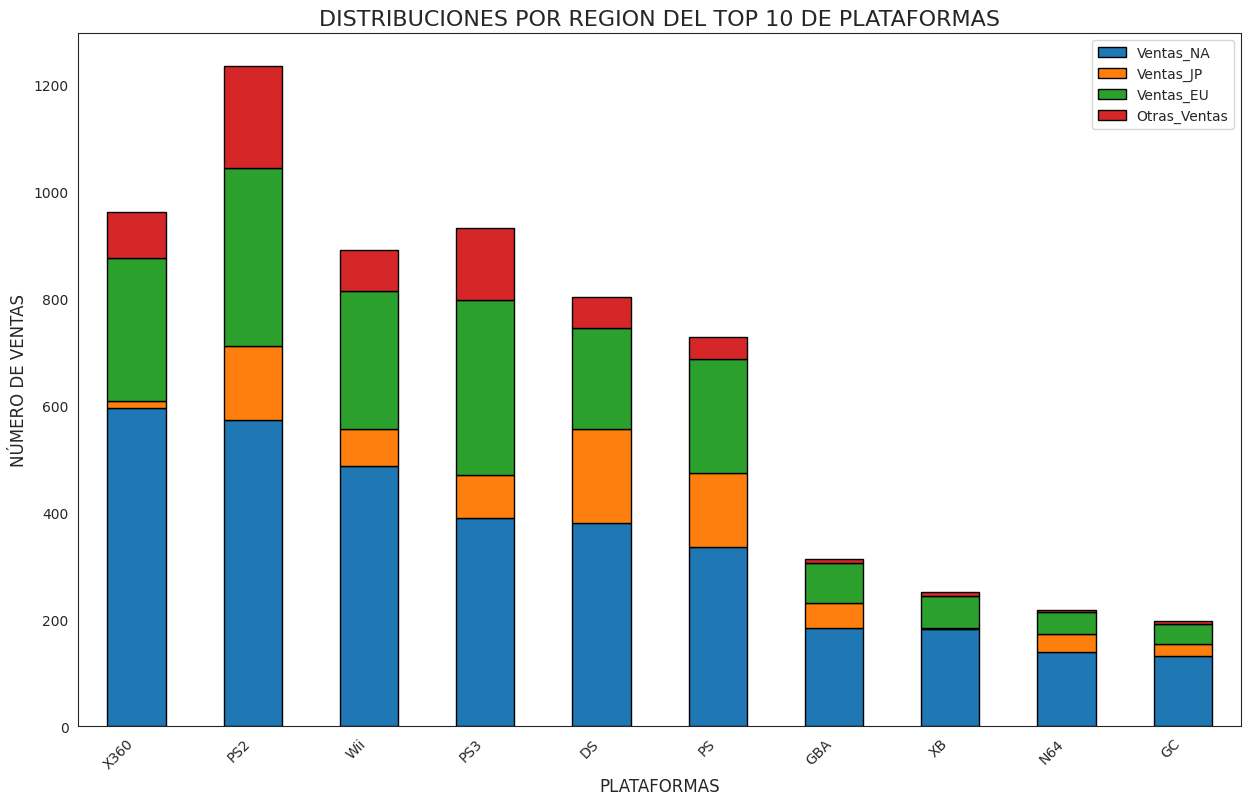

In [ ]:
# Graficaré mi top 10 plataformas distribuidas en las 3 principales regiones y el resto
top_plataformas_region = df.groupby('Plataforma')[['Ventas_NA','Ventas_JP','Ventas_EU', 'Otras_Ventas']].sum().reset_index()
top_plataformas_region = top_plataformas_region.sort_values('Ventas_NA', ascending=False).head(10)

sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,9))
top_plataformas_region.plot(kind='bar',
                            x='Plataforma',
                            stacked=True,
                            ax=ax,
                            edgecolor='black')

plt.title('TOP 10 PLATAFORMAS CON MÁS VENTAS EN TODAS LAS REGIONES', fontsize=16, fontweight='bold')
ax.set_title('DISTRIBUCIONES POR REGION DEL TOP 10 DE PLATAFORMAS', fontsize=16)
ax.set_xlabel('PLATAFORMAS', fontsize=12)
ax.set_ylabel('NÚMERO DE VENTAS', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
df_grafico_top_plataformas_region = top_plataformas_region.melt(
    id_vars=['Plataforma'],
    value_vars=['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas'],
    var_name='Region',
    value_name='Ventas (En millones)')

# Renombro las etiquetas de las regiones para la gráfica
df_grafico_top_plataformas_region['Region'] = df_grafico_top_plataformas_region['Region'].replace({
    'Ventas_NA': 'VENTAS DE NORTEAMERICA',
    'Ventas_EU': 'VENTAS DE EUROPA',
    'Ventas_JP': 'VENTAS DE JAPON',
    'Otras_Ventas': 'VENTAS DE OTROS PAISES'})

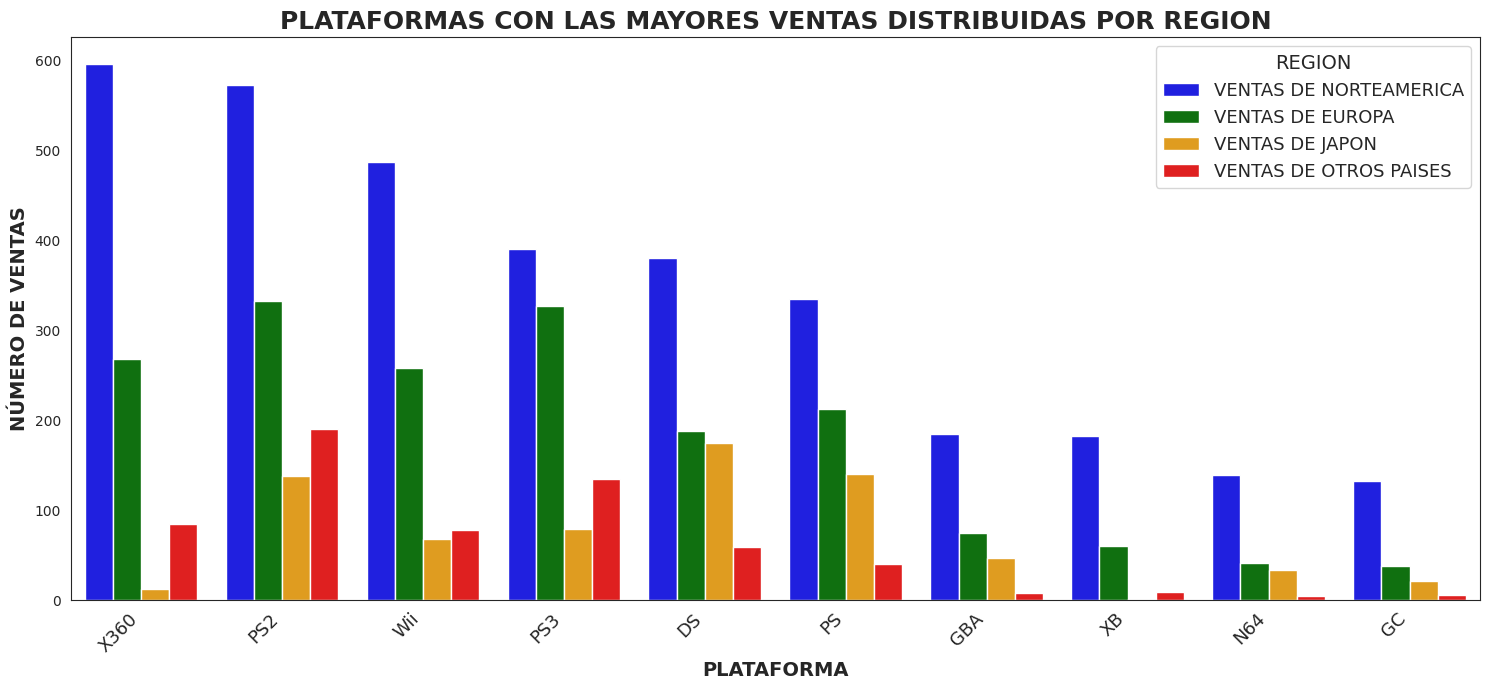

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(
    x='Plataforma',
    y='Ventas (En millones)',
    hue='Region',
    data = df_grafico_top_plataformas_region,
    palette=['blue', 'green', 'orange', 'red'])

# Configuro el estilo del gráfico y las etiquetas
plt.title('PLATAFORMAS CON LAS MAYORES VENTAS DISTRIBUIDAS POR REGION', fontsize=18, fontweight='bold')
plt.xlabel('PLATAFORMA', fontsize=14, fontweight='bold')
plt.ylabel('NÚMERO DE VENTAS', fontsize=14, fontweight='bold')
plt.xticks(fontsize=13, rotation=45, ha='right')

# Configuro la leyenda
plt.legend(title='REGION',
           loc='upper right',
           fontsize=13,
           title_fontsize='14')

plt.tight_layout()
plt.show()

Ahora haré sacaré una tendencia de las ventas por regiones y por plataformas

In [ ]:
# Genero el df de ventas anuales
df_ventas_anuales_plataforma = df.groupby(['Año_de_Lanzamiento', 'Plataforma'])[['Ventas_Globales']].sum().reset_index()

# Saco el top 10 historico, para hacer una grafica más limpia
ventas_totales_por_plataforma = df.groupby('Plataforma')['Ventas_Globales'].sum()
top_10_plataformas_lista = ventas_totales_por_plataforma.nlargest(10).index.tolist()

df_ventas_anuales_plataforma_top_10 = df_ventas_anuales_plataforma[
    df_ventas_anuales_plataforma['Plataforma'].isin(top_10_plataformas_lista)
]

# Cambio el nombre de las etiquetas
df_ventas_anuales_plataforma_top_10 = df_ventas_anuales_plataforma_top_10.melt(
    id_vars=['Año_de_Lanzamiento', 'Plataforma'],
    value_vars=['Ventas_Globales'],
    var_name='Region',
    value_name='Ventas(En millones)')

In [ ]:
plt.figure(figsize=(16, 8))

# Procedo a graficar un histograma sobre las ventas
sns.lineplot(
    data=df_ventas_anuales_plataforma_top_10,
    x='Año_de_Lanzamiento',
    y='Ventas(En millones)',
    hue='Plataforma',
    legend=True,
    palette='tab10')

# Configuro mi grafico
plt.title('TENDENCIA DE VENTAS GLOBALES POR PLATAFORMA (1980-2016)', fontsize=16, fontweight='bold')
plt.xlabel('FECHA', fontsize=14, fontweight='bold')
plt.ylabel('Ventas Globales (En millones)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.legend(title='Plataforma', bbox_to_anchor=(1.09, 1.06), loc='upper left')

plt.tight_layout()

plt.show()

# 3. RESPUESTA
---

Tras analizar los resultados de ventas globales y regionales, mi hipótesis fue parcialmente confirmada. Originalmente, creí que la Nintendo Wii sería la plataforma más vendida globalmente, pero los datos del gráfico de barras demuestran que la PS2 ostenta el título de la plataforma histórica con mayores ventas totales. A nivel regional, acerté en que la XBOX360 dominaría Norteamérica (NA) y que la Nintendo DS sería la líder en Japón, lo cual concuerda con las tendencias esperadas. Sin embargo, me equivoqué rotundamente con Europa (EU), donde mi hipótesis apuntaba al PC como líder; en realidad, los datos revelan que la PS2 también fue la principal plataforma en el mercado europeo, mostrando un dominio más consistente y equilibrado a nivel mundial que el resto de las consolas.

---
